In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
import sklearn as sk
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

In [59]:
#/Users/sofia/Desktop/Herramientas computacionales/ua-imec2001-hc-202310-s2/project/data/wind/wind.csv
dfwind = pd.read_csv(filepath_or_buffer='wind/wind.csv')


dfwind.head()

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1


In [60]:
#Esta parte del codigo cambia los valores que sean =< 27 y >= 7 por 0
dfwind.loc[dfwind['temperature'] >= 27,'wind_speed_ms-1'] = 0
dfwind.loc[dfwind['temperature'] <= 10,'wind_speed_ms-1'] = 0
dfwind

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1
...,...,...,...
26299,2017-12-31 19:00:00,7.44,25.1
26300,2017-12-31 20:00:00,7.72,25.0
26301,2017-12-31 21:00:00,7.98,25.2
26302,2017-12-31 22:00:00,6.77,25.6


In [61]:
#se comprueba que si se hallan cambiando los valores
chequeo = dfwind['temperature'] >= 27
print(dfwind[chequeo].head(2))

                timestamp  wind_speed_ms-1  temperature
3688  2015-06-03 16:00:00              0.0         27.1
3689  2015-06-03 17:00:00              0.0         27.2


In [62]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc='center right')
    plt.tight_layout;

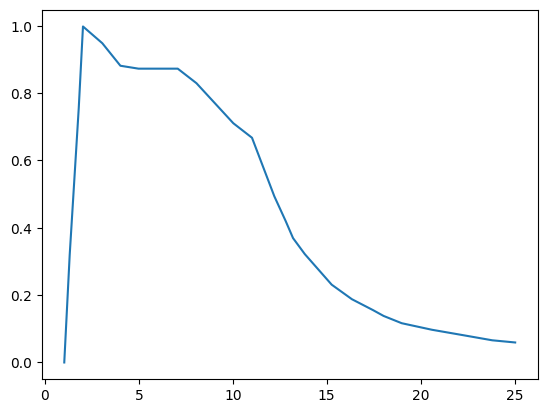

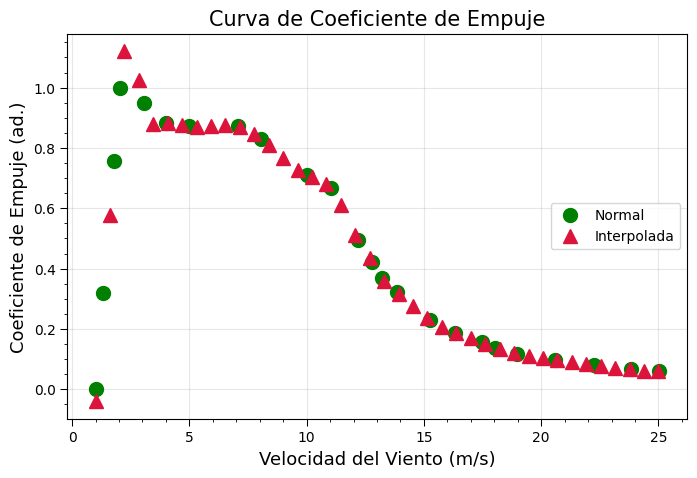

In [63]:
#C:/Users/sofia/Desktop/project/wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv
df_C_empuje = pd.read_csv('wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv')
#G1 = grafica 1
#G2 = grafica 2
plt.figure()
x_G1=df_C_empuje["x"].values
y_G1=df_C_empuje["y"].values
plt.plot(x_G1,y_G1)
plt.show()

df_C_empuje.head()

a=1
b=25

itp_spline = scipy.interpolate.splrep(x_G1, y_G1, k=3)
x_new = np.linspace(start=a, stop=b, num=40)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_G1, y_G1, linestyle='', marker='o', color='green', ms=10, label='Normal')
plt.plot(x_new, y_new, linestyle='', marker='^', color='crimson', ms=10, label='Interpolada')

formato_grafica(titulo='Curva de Coeficiente de Empuje', 
                ejex='Velocidad del Viento (m/s)', 
                ejey='Coeficiente de Empuje (ad.)')

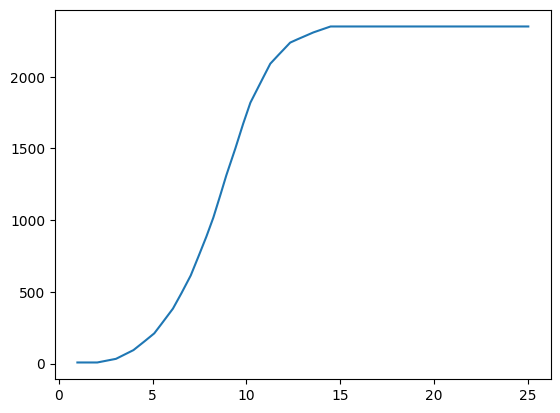

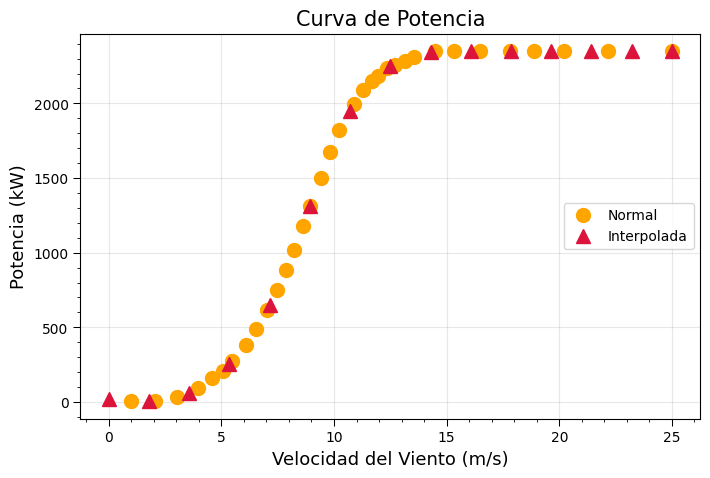

In [64]:

df_potencia = pd.read_csv('wind/Potencia Vs velocidad viento (Corregido).csv')
"""
Como los valores se extrajeron de forma visual hay algunos que sobrepasan los máximos,
por eso se aplica la siguiente funcion que cambia todos los valroes que son mayores al máximo por 2350
"""
df_potencia.loc[df_potencia['y'] > 2350,'y'] = 2350
plt.figure()
x_G2=df_potencia["x"].values
y_G2=df_potencia["y"].values
plt.plot(x_G2,y_G2)
plt.show()

a=0
b=25

itp_spline = scipy.interpolate.splrep(x_G2, y_G2, k=3)
x_new = np.linspace(start=a, stop=b, num=15)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_G2, y_G2, linestyle='', marker='o', color='orange', ms=10, label='Normal')
plt.plot(x_new, y_new, linestyle='', marker='^', color='crimson', ms=10, label='Interpolada')

formato_grafica(titulo='Curva de Potencia', 
                ejex='Velocidad del Viento (m/s)', 
                ejey='Potencia (kW)')



In [65]:
#velocidad incidente
K_ZG1 = 0.04
K_ZG2_3 = 0.08
D = 92

def velocidad_incidente(velocidad_del_viento,k,x):
    D=92
    spline = scipy.interpolate.splrep(df_C_empuje["x"],df_C_empuje["y"])
    coeficiente_de_empuje = scipy.interpolate.splev(velocidad_del_viento,spline)
    a = (1/2)*(1-np.sqrt(1-coeficiente_de_empuje))
    velocidad_incidente = velocidad_del_viento*(1-((2*a)/(1+2*k*x/D**2)))
    return velocidad_incidente


In [66]:
#generadores 1,2,3,4 y 7 v = v0
#generadores 5 y 6 x=500m, k=K_ZG2_3
#generadores 8 y 9 x=1000m,k=K_ZG2_3
#m=3 n=dfwind.shape[0], puesto que solo hay 3 casos diferentes
headers = ["generadores 1-4 y 7","generadores 5 y 6","generadores 8 y 9"]
df_vx=pd.DataFrame(columns=headers,index=range(dfwind.shape[0]))
print(dfwind.shape[0])
print(df_vx.shape[0])


26304
26304


In [67]:
df_vx["generadores 1-4 y 7"]=dfwind["wind_speed_ms-1"]
df_vx["generadores 5 y 6"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,500)
df_vx

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14224\1662998649.py:10: RuntimeWarning: invalid value encountered in sqrt
  a = (1/2)*(1-np.sqrt(1-coeficiente_de_empuje))


,generadores 1-4 y 7,generadores 5 y 6,generadores 8 y 9
0,10.48,5.800004,NaN
1,10.40,5.734134,NaN
2,10.53,5.842873,NaN
3,10.52,5.834176,NaN
4,10.37,5.710086,NaN
...,...,...,...
26299,7.44,2.814305,NaN
26300,7.72,3.046355,NaN
26301,7.98,3.290469,NaN
26302,6.77,2.418360,NaN


In [68]:
df_vx["generadores 8 y 9"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,1000)
df_vx

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14224\1662998649.py:10: RuntimeWarning: invalid value encountered in sqrt
  a = (1/2)*(1-np.sqrt(1-coeficiente_de_empuje))


,generadores 1-4 y 7,generadores 5 y 6,generadores 8 y 9
0,10.48,5.800004,5.843418
1,10.40,5.734134,5.777416
2,10.53,5.842873,5.886353
3,10.52,5.834176,5.877643
4,10.37,5.710086,5.753314
...,...,...,...
26299,7.44,2.814305,2.857215
26300,7.72,3.046355,3.089710
26301,7.98,3.290469,3.333971
26302,6.77,2.418360,2.458728
